   주문번호   메뉴  수량
0     1   김밥   1
1     2  떡볶이   2
2     3   김밥   1
3     4   라면   1
4     5   라면   4
5     6   김밥   2

메뉴
라면     5
김밥     4
떡볶이    2
Name: 수량, dtype: int64

가장 인기 있는 메뉴는 라면(으)로 총 4개 판매되었습니다.


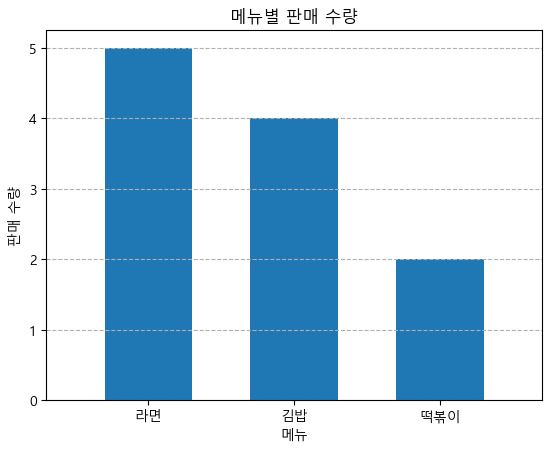

In [1]:
# Q1
'''
- 분식집 주문 분석하기
pandas 로 음식점 주문 데이터를 분석하고, 인기 메뉴를 파악
'''
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd

df_csv = pd.read_csv("dataset/orders.csv")
print(f"{df_csv}\n")

df = df_csv.groupby('메뉴')['수량'].sum().sort_values(ascending=False)
print(f"{df}\n")

print(f"가장 인기 있는 메뉴는 {df.idxmax()}(으)로 총 4개 판매되었습니다.")

plt.bar(df.index, df.values, width=0.6)
plt.title('메뉴별 판매 수량')
plt.xlabel('메뉴')
plt.ylabel('판매 수량')
plt.xlim(-0.7, 2.7)
plt.grid(axis='y', ls='--')
plt.show()

In [3]:
# Q2
'''
- 학생 성적 분석
시험 성적 데이터를 pandas 로 분석하고 반 평균, 최고점, 최저점 학생을 파악
'''
import pandas as pd

df = pd.DataFrame({
  '이름': ['영희', '철수', '민수'],
  '국어': [80, 90, 85],
  '영어': [70, 95, 88],
  '수학': [85, 80, 90]
})
# df['평균'] = df.mean(axis=1, numeric_only=True)
df['평균'] = df[['국어', '영어', '수학']].mean(axis=1).round(2)

print(f"{df}\n")

# df.iloc, df.loc [행, 열]
print(f"최고 평균 점수 학생: {df.loc[df['평균'].idxmax(), '이름']}")
print(f"최저 평균 점수 학생: {df.loc[df['평균'].idxmin(), '이름']}")

   이름  국어  영어  수학     평균
0  영희  80  70  85  78.33
1  철수  90  95  80  88.33
2  민수  85  88  90  87.67

최고 평균 점수 학생: 철수
최저 평균 점수 학생: 영희


In [6]:
# Q3
'''
- 출석부 결측치 처리
출석/결석 데이터를 pandas 로 처리, 결석 횟수를 분석
'''
import pandas as pd

# data = {
#   '이름': ['영희', '철수', '민수'],
#   '1일차': ['출석', None, '출석'],
#   '2일차': ['출석', '결석', None]
# }
# df = pd.DataFrame(data)
# print(f"{df}\n")

# print(f"{df.isnull()}\n")
# df = df.fillna({'1일차': '결석', '2일차': '결석'})
# print(df)

# df['결석수'] = (df == '결석').sum(axis=1)
# df.sort_values(by='결석수', ascending=False)

df = (pd.DataFrame({
  '이름': ['영희', '철수', '민수'],
  '1일차': ['출석', None, '출석'],
  '2일차': ['출석', '결석', None]
})
.fillna('결석')
.assign(결석수 = lambda x: (x[['1일차', '2일차']] == '결석').sum(axis=1))
.sort_values(by='결석수', ascending=False)
)
df


,이름,1일차,2일차,결석수
1,철수,결석,결석,2
2,민수,출석,결석,1
0,영희,출석,출석,0


요일
금    305.0
목    135.0
수    155.0
월    110.0
화    205.0
Name: 매출, dtype: float64

가장 매출이 높은 요일: 금요일


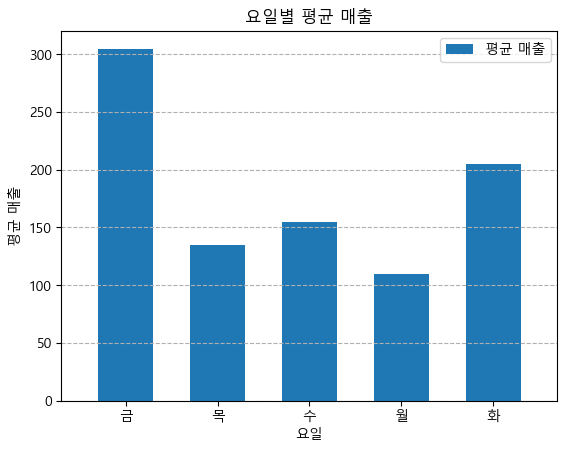

In [196]:
# Q4
'''
주간 매출 분석
요일별 매출 데이터를 분석하고 평균 매출 및 최고 매출 요일을 파악
'''
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
df = pd.DataFrame({
  '요일': ['월', '화', '수', '목', '금'] * 2,
  '매출': [100, 200, 150, 130, 300, 120, 210, 160, 140, 310]
})
df = df.groupby('요일')['매출'].mean()
print(f"{df}\n")

print(f"가장 매출이 높은 요일: {df.idxmax()}요일")

plt.bar(df.index, df.values, width=0.6, label='평균 매출')
plt.title('요일별 평균 매출')
plt.xlabel('요일')
plt.ylabel('평균 매출')
plt.xlim(-0.7, 4.7)
plt.grid(axis='y', ls='--')
plt.legend()
plt.show()

장르   도서명  
추리   셜록홈즈     2
판타지  해리포터     2
     반지의제왕    2
역사   삼국지      1
인문   총균쇠      1
dtype: int64

가장 인기 있는 장르는 '판타지'입니다.


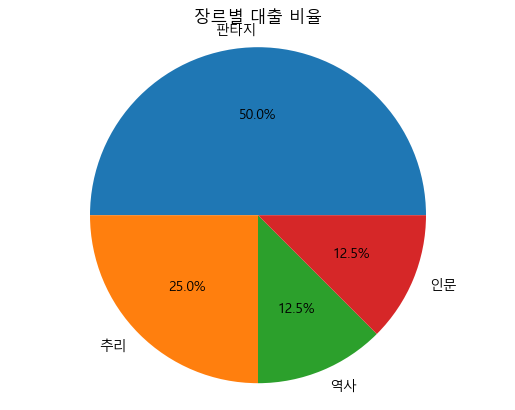

In [55]:
# Q5
'''
- 도서 대출 기록 분석
도서관 장르별 대출 횟수를 분석하고 가장 인기 있는 장르를 시각화
'''
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd

df = pd.DataFrame({
  '대출자': [
    '홍길동', '김영희', '이민수','박수현', '최정우', '김서연', '이민지', '유재석'
    ],
  '도서명': [
    '해리포터', '셜록홈즈', '반지의제왕', '삼국지', '해리포터', '셜록홈즈', '총균쇠', '반지의제왕'
    ],
  '장르': [
    '판타지', '추리', '판타지', '역사', '판타지', '추리', '인문', '판타지'
    ]
})

# df_count = df.groupby('장르').size()
# groupby 가 반환하는 값은 Series, DataFrame 아닌 groupby 객체
# 여러 개의 컬럼을 기준으로 그룹화 할 수 있음, 이 그룹화된 결과는 DataFrame처럼 보일 수 있음
# Series 전용 메서드인 value_counts() 와 다르게 오름차순이 기본 속성

df_genre_count = df['장르'].value_counts()
df_count = df.groupby(['장르', '도서명']).size().sort_values(ascending=False)
print(f"{df_count}\n")
popular_genre = df_count.groupby('장르').sum().idxmax() # 장르별 도서 수 합산 후 가장 큰 값 찾기
print(f"가장 인기 있는 장르는 '{popular_genre}'입니다.")

plt.pie(df_genre_count, labels=df_genre_count.index, autopct='%1.1f%%', counterclock=True)
plt.title("장르별 대출 비율")
plt.axis('equal')
plt.show()

선호 여행지
제주도    3
부산     2
강릉     1
Name: count, dtype: int64

선호 여행지  강릉  부산  제주도
성별                 
남        1   1    1
여        0   1    2



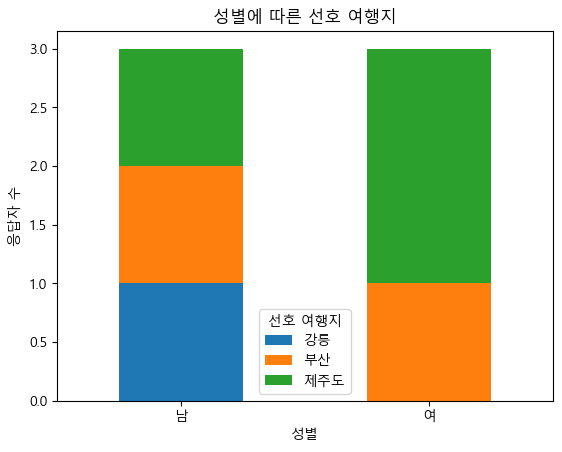

In [56]:
# Q6
'''
- 여행 설문 결과 분석
여행 선호지 설문 데이터를 분석하여 선호 지역과 성별 간 차이를 파악
'''
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd

df = pd.DataFrame({
  '이름': ['영희', '철수', '민수', '수진', '정우', '가영'],
  '성별': ['여', '남', '남', '여', '남', '여'],
  '선호 여행지': ['제주도', '부산', '강릉', '제주도', '제주도', '부산']
})

travel = df['선호 여행지'].value_counts()
print(f"{travel}\n")
cross = pd.crosstab(df['성별'], df['선호 여행지'])
print(f"{cross}\n")
cross.plot(kind='bar', title='성별에 따른 선호 여행지', stacked=True)
plt.xlabel('성별')
plt.xticks(rotation=0)
plt.ylabel('응답자 수')
plt.show()

동물
강아지    4
고양이    3
Name: count, dtype: int64

진료 항목
감기     3
피부병    2
설사     1
구토     1
Name: count, dtype: int64

가장 흔한 진료 항목은 '감기'입니다



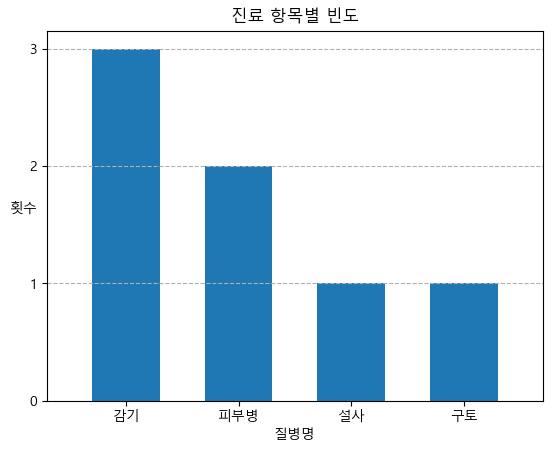

In [82]:
# Q7
'''
- 반려동물 병원 내원 기록 분석
반려동물 병원의 진료 데이터를 분석하여 방문 빈도와 주요 질병 통계를 파악
'''

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd

df = pd.DataFrame({
  '보호자': [
    '김철수', '이영희', '박민수', '최지훈', '조수진', '홍길동', '유재석'
    ],
  '동물': [
    '강아지', '고양이', '강아지', '강아지', '고양이', '강아지', '고양이'
    ],
  '진료 항목': [
    '피부병', '감기', '피부병', '설사', '구토', '감기', '감기'
  ]
})

visit_count = df['동물'].value_counts()
print(f"{visit_count}\n")
medical_list = df['진료 항목'].value_counts()
print(f"{medical_list}\n")
print(f"가장 흔한 진료 항목은 '{medical_list.idxmax()}'입니다\n")

medical_list.plot(kind='bar', title='진료 항목별 빈도', width=0.6)
plt.xlabel('질병명')
plt.xticks(rotation=0)
plt.ylabel('횟수', rotation=0)
plt.xlim(-0.7,3.7)
plt.yticks(range(0, 4, 1))
plt.grid(axis='y', ls='--')
plt.show()


평균 조회수: 15000.0

조회수 TOP 3 영상:
        제목    조회수
1       먹방  22000
2   강아지 영상  18000
0  여행 브이로그  15000


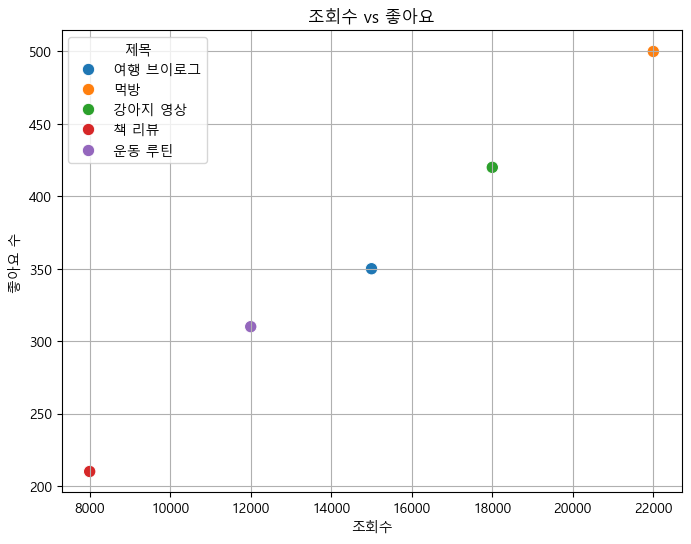

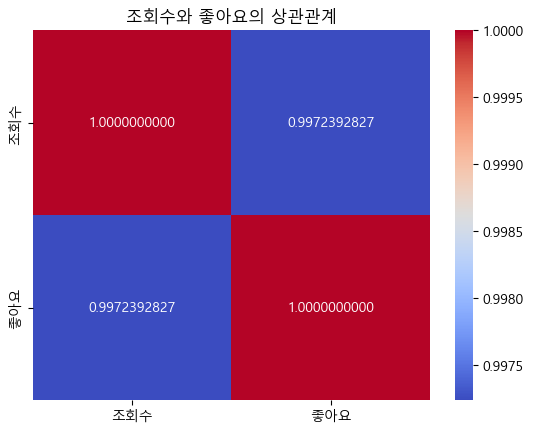

In [119]:
# Q8
'''
- 유튜브 조회수 통계 분석
유튜브 영상의 조회수 및 좋아요 수 데이터를 분석하여 인기 영상과 상관관계를 확인
'''

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
import seaborn as sns

df = pd.DataFrame({
  '제목' : ['여행 브이로그', '먹방', '강아지 영상', '책 리뷰', '운동 루틴'],
  '조회수' : [15000, 22000, 18000, 8000, 12000],
  '좋아요' : [350, 500, 420, 210, 310]
})

avg_visit = df['조회수'].mean()
print(f"평균 조회수: {avg_visit}\n")

top_video = df.sort_values(by='조회수', ascending=False).head(3)[['제목', '조회수']]
print(f"조회수 TOP 3 영상:\n{top_video}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='조회수', y='좋아요', hue='제목', s=80)
plt.title('조회수 vs 좋아요')
plt.xlabel('조회수')
plt.ylabel('좋아요 수')
plt.grid(True)
plt.show()

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.10f')
plt.title('조회수와 좋아요의 상관관계')
plt.show()

[전체 교통량 데이터]
           시간대  교통량
0  06:00~07:00  300
1  07:00~08:00  500
2  08:00~09:00  800
3  09:00~10:00  650
4  17:00~18:00  700
5  18:00~19:00  900
6  19:00~20:00  600
7  20:00~21:00  400

가장 혼잡한 시간대는 18:00~19:00 입니다


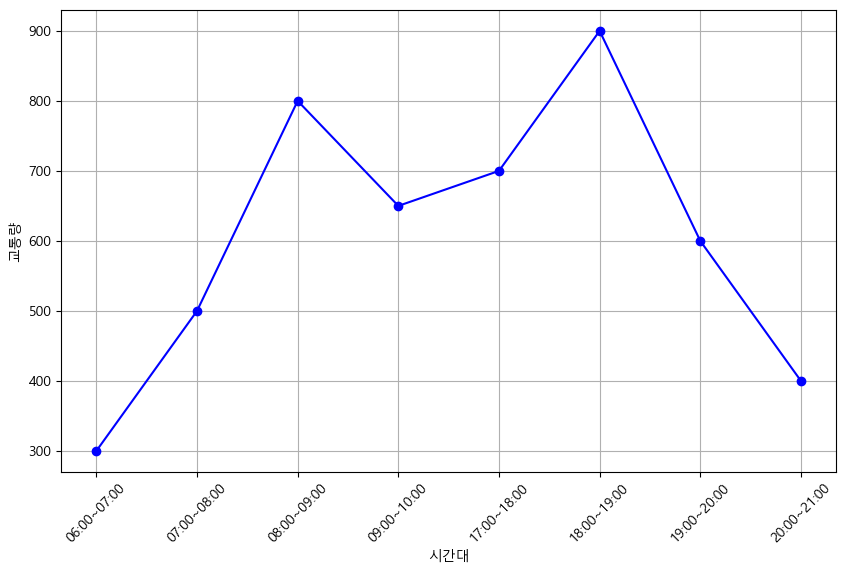

In [60]:
# Q9
'''
- 도시간 교통량 분석
시간대별 교통량 데이터를 분석하여 혼잡 시간대를 파악하고 시각화
'''
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd

df = pd.DataFrame({
  '시간대': [
    '06:00~07:00', '07:00~08:00', '08:00~09:00', '09:00~10:00', '17:00~18:00', '18:00~19:00', '19:00~20:00', '20:00~21:00'
  ],
  '교통량': [300, 500, 800, 650, 700, 900, 600, 400]
})
print(f"[전체 교통량 데이터]\n{df}\n")
rush_hour = df.groupby('시간대')['교통량'].mean().idxmax()
print(f"가장 혼잡한 시간대는 {rush_hour} 입니다")

fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='line', x='시간대', y='교통량', color='blue', marker='o', legend=False, ax=ax)
plt.grid(True)
plt.xlabel('시간대')
plt.xticks(rotation=45)
plt.ylabel('교통량')
plt.show()

In [ ]:
# Q10
'''

'''

전체 생존률: 38.4%

Sex
female    74.2%
male      18.9%
Name: Survived, dtype: object

Pclass
1    63.0%
2    47.3%
3    24.2%
Name: Survived, dtype: object

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


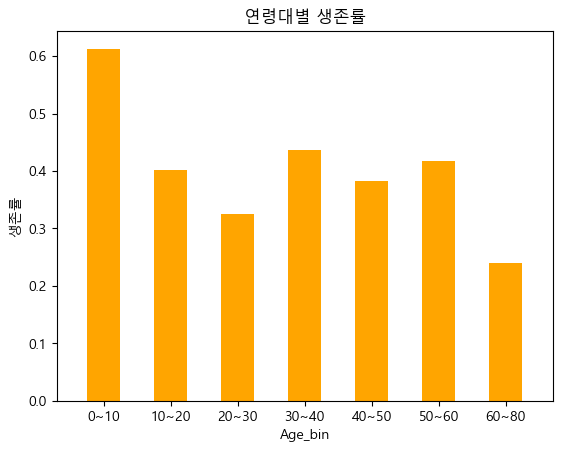

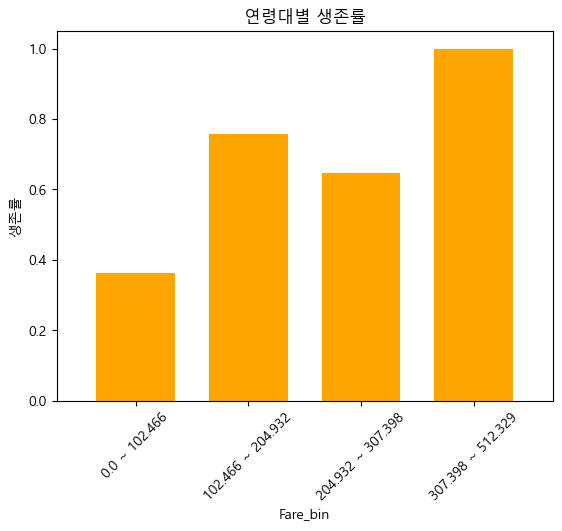

In [14]:
# Q11
'''
- 타이타닉 생존자 분석
타이타닉 탑승자 데이터를 활용하여 생존율, 그룹별 통계, 시각화를 수행

Survived : 생존 여부 (0 : 사망 / 1 : 생존)
Pclass : ticket에 따른 객실 등급
Sex : 성별
Age : 나이
SibSp : 동반한 형제자매와 배우자의 수
Parch : 동반한 부모 자식의 수
Ticket : ticket number
Fare : ticket의 요금
Cabin : 객실 번호
Embarked : 탑승 지역(항) (C : Cherbourg / Q : Queenstown / S : Southampton
'''

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

real_df = df.fillna({
  'Age': df['Age'].mean(),
  'Embarked': df['Embarked'].mode()[0]
})
real_df.drop(columns=['Cabin'], inplace=True)

survived_all = real_df['Survived'].mean().round(3)
print(f"전체 생존률: {survived_all * 100}%\n")

survived_sex = real_df.groupby('Sex', observed=True)['Survived'].mean().round(3).apply(lambda x: f"{x * 100}%")
print(f"{survived_sex}\n")

survived_pclass = real_df.groupby('Pclass', observed=True)['Survived'].mean().round(3).apply(lambda x: f"{x * 100}%")
print(f"{survived_pclass}\n")

pivot = pd.pivot_table(real_df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
print(f"{pivot}")

real_df.groupby(
  pd.cut(
    real_df['Age'],
    bins=[0, 10, 20, 30, 40, 50, 60, 80],
    labels=['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~80'],
    right=False
  ),
  observed=True
)['Survived'].mean().plot(kind='bar', color='orange', title='연령대별 생존률')
plt.xlabel('Age_bin')
plt.xticks(rotation=0)
plt.xlim(-0.7, 6.7)
plt.ylabel('생존률')
plt.show()

bins = np.linspace(0, real_df['Fare'].max(), 6)
bins = np.delete(bins, 4)
bins[-1] += 0.0001
labels = [f"{round(bins[i], 3)} ~ {round(bins[i+1], 3)}" for i in range(4)]
real_df.groupby(
  pd.cut(
    real_df['Fare'], bins=bins, labels=labels, right=False
  ),
  observed=True
)['Survived'].mean().plot(kind='bar', color='orange', title='연령대별 생존률', width=0.7)
plt.xlabel('Fare_bin')
plt.xticks(rotation=45)
plt.xlim(-0.7, 3.7)
plt.ylabel('생존률')
plt.show()

[월별 매출]
               매출
날짜               
2023-01-31  110.0
2023-02-28   90.0
2023-03-31  140.0
2023-04-30    0.0
2023-05-31  130.0
2023-06-30    0.0
2023-07-31  150.0


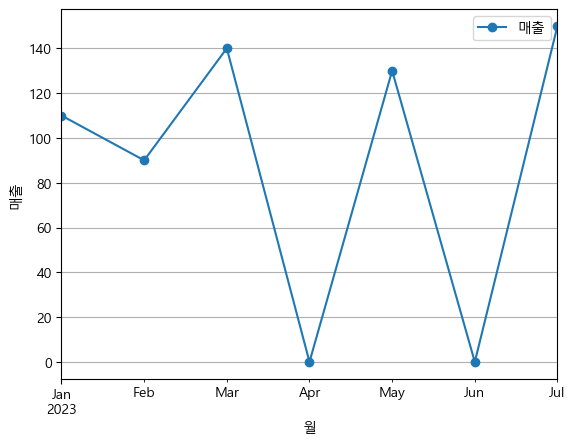

In [1]:
# Q12
'''
- 시계열 기반 매출 전처리
일자별 매출 데이터를 월별로 집계하고 결측 구간을 처리하며 시계열 분석을 수행
'''

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd

df = pd.DataFrame({
  '날짜': [
    '2023-01-01', '2023-01-10', '2023-02-05', '2023-03-15', '2023-05-20', '2023-07-01'
    ],
  '매출': [100, 120, 90, 140, 130, 150]
})
df['날짜'] = pd.to_datetime(df['날짜'])
df.set_index('날짜', inplace=True)
df_month = df.resample('ME').mean()
df_month['매출'] = df_month['매출'].fillna(0)
print(f"[월별 매출]\n{df_month}")

df_month.plot(kind='line', marker='o')
plt.grid(axis='y')
plt.xlabel('월')
plt.ylabel('매출')
plt.show()


In [110]:
# Q13
'''
- 온라인 쇼핑몰 장바구니 분석
장바구니 데이터를 분석하여 고객별 구매 패턴, 제품군별 인기 상품, 교차표 분석 수행
'''

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd

df = pd.DataFrame({
  '고객ID': [
    'C001', 'C002', 'C001', 'C003', 'C002', 'C004', 'C001', 'C003'
  ],
  '제품군': [
    '식품', '식품', '생활용품', '의류', '식품', '식품', '의류', '생활용품'
  ],
  '상품명': [
    '라면', '김치', '휴지', '티셔츠', '라면', '초콜릿', '양말', '세제'
  ],
  '수량': [2, 1, 3, 1, 1, 2, 2, 1]
})

mean_buy = df.groupby('고객ID')['수량'].mean().round(2)
print(f"고객별 평균 구매 건수:\n{mean_buy}\n")

most_sold_item = df.groupby('제품군').apply(lambda x: x.loc[x['수량'].idxmax(), ['상품명', '수량']])
print(f"제품군별 인기 상품:\n{most_sold_item}\n라면이 2개 뜬 이유 찾기\n")

popular_product = df.groupby(['제품군', '상품명'])['수량'].sum().reset_index()
idx = popular_product.groupby('제품군')['수량'].idxmax()
top_items = popular_product.loc[idx].set_index('제품군')
print(f"제품군별 인기 상품2:\n{top_items[['상품명', '수량']]}\n")

cross = pd.crosstab(df['고객ID'], df['제품군'])
print(f"고객별 제품군 구매 교차표:\n{cross}")

고객별 평균 구매 건수:
고객ID
C001    2.33
C002    1.00
C003    1.00
C004    2.00
Name: 수량, dtype: float64

제품군별 인기 상품:
     상품명  수량
제품군         
생활용품  휴지   3
식품    라면   2
의류    양말   2
라면이 2개 뜬 이유 찾기

제품군별 인기 상품2:
     상품명  수량
제품군         
생활용품  휴지   3
식품    라면   3
의류    양말   2

고객별 제품군 구매 교차표:
제품군   생활용품  식품  의류
고객ID              
C001     1   1   1
C002     0   2   0
C003     1   0   1
C004     0   1   0


C:\Users\hi\AppData\Local\Temp\ipykernel_6368\739233028.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_sold_item = df.groupby('제품군').apply(lambda x: x.loc[x['수량'].idxmax(), ['상품명', '수량']])
